In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import spacy

from matplotlib.pyplot import imread
from wordcloud import wordcloud, STOPWORDS
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from google.colab import files
files.upload()

In [ ]:
tw=pd.read_csv("Elon_musk.csv",encoding="Latin-1")

In [ ]:
type(tw)

pandas.core.frame.DataFrame

In [ ]:
tw=tw.drop(["Unnamed: 0"],axis=1)

In [ ]:
tw.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
tw.shape

(1999, 1)

In [ ]:
tw=[Text.strip() for Text in tw]  # remove both leading and trailing characters
tw


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
tw=[Text for Text in tw if Text]  # remove empty string
tw

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
# Joining the list into one string
tw_text=" ".join(tw)
tw_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
# remove Twitter usename handles
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer(strip_handles=True)
tw_tokens=tk.tokenize(tw_text)
tw_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have',
 'you',
 'tried',
 'it',
 '?',
 'Great',
 'interview',
 '!',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 '!',
 'https://t.co/9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 ',',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 'Himself',
 'most',
 'of',
 'all',
 '.',
 'https://t.co/zGxJFDzzrM',
 'Haha',
 'thanks',
 ':)',
 'Indeed',
 '!',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real-world',
 'time',
 'allocation',
 '.',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'https://t.co/3rWE9uHSTS',
 'It',
 '

In [ ]:
# Jion the list into one string
tw_tokens_text=" ".join(tw_tokens)
tw_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [ ]:
# remove punctuations
no_punc_text=tw_tokens_text.translate(str.maketrans(" "," ",string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [ ]:
# remove https and url within text
import re 
no_url_text=re.sub(r"http\S+"," ",no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox    Frodo was the underdoge  All thought he would fail  Himself most of all    Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with   It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha   Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission    Yes Once we can predict cash flow r

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
text_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitel

In [ ]:
# tokens count
len(text_tokens)

17847

In [ ]:
# remove stopwords
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
sw=["\x92",'rt','ye','yeah','haha','Yes','I','U0001F495','U0001F3B6','U0001F923','U0001F5A4']
stop_words.extend(sw)

no_sw_tokens=[word for word in text_tokens if not word in stop_words]
no_sw_tokens

['alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'Great',
 'interview',
 'Doge',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'It',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'He',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'Thanks',
 'fixing',
 'Please',
 'unlock',
 'account',
 'This',
 'true',
 'power',
 'Any',
 'crypto',
 'wallet',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'Your',
 'app',
 'sucks',
 'RT',
 'NASA',
 'selected',
 'Falcon',
 'Heavy',
 'launch',
 'first',
 'two',


In [ ]:
# normalize the data 
lower_words=[Text.lower() for Text in no_sw_tokens]
lower_words

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thanks',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'it',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'thanks',
 'fixing',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'your',
 'app',
 'sucks',
 'rt',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',


In [ ]:
# stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stem_tokens=[ps.stem(word) for word in lower_words]
stem_tokens

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'pleas',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'ani',
 'crypto',
 'wallet',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',
 'mission',
 'onc'

In [ ]:
# Lemmatization
nlp=spacy.load("en_core_web_sm")
doc=nlp(" ".join(lower_words))
doc

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [ ]:
lemmas=[token.lemma_ for token in doc]
lemmas

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimate',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'think',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'it',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gatewa

In [ ]:
clean_tw=" ".join(lemmas)
clean_tw

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 100 m 

Feature Extraction
 1. Using CountVectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tw_cv=cv.fit_transform(lemmas)
cv.vocabulary_

{'alien': 195,
 'ray': 2359,
 'trace': 3023,
 'cyberpunk': 769,
 'hdr': 1364,
 'nextlevel': 1969,
 'have': 1359,
 'try': 3055,
 'great': 1312,
 'interview': 1561,
 'doge': 894,
 'underestimate': 3185,
 'congratulation': 677,
 'tesla': 2931,
 'china': 587,
 'amazing': 219,
 'execution': 1063,
 'last': 1645,
 'year': 3402,
 'now': 1997,
 'next': 1968,
 'even': 1037,
 'happy': 1346,
 'new': 1966,
 'ox': 2098,
 'frodo': 1213,
 'underdoge': 3184,
 'all': 198,
 'think': 2959,
 'would': 3388,
 'fail': 1098,
 'himself': 1406,
 'haha': 1335,
 'thank': 2941,
 'indeed': 1502,
 'tweet': 3070,
 'definitely': 807,
 'represent': 2426,
 'realworld': 2374,
 'time': 2982,
 'allocation': 200,
 'the': 2945,
 'entertaining': 1007,
 'outcome': 2076,
 'likely': 1699,
 'just': 1603,
 'send': 2569,
 'agree': 179,
 'clubhouse': 616,
 'it': 1580,
 'get': 1272,
 'real': 2369,
 'buy': 505,
 'dogecoin': 896,
 'lil': 1700,
 'toddler': 2993,
 'hodler': 1412,
 'he': 1365,
 'issue': 1579,
 'sentencing': 2574,
 'seem': 

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '005',
 '10',
 '100',
 '1000',
 '10000',
 '107',
 '10x',
 '11',
 '12',
 '122',
 '13',
 '130',
 '14',
 '140',
 '149',
 '15',
 '150',
 '155',
 '16',
 '162',
 '17',
 '18',
 '1880s',
 '1b',
 '1st',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '2012',
 '2017',
 '2020',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240',
 '25',
 '250',
 '250kw',
 '25gunsteslacom',
 '25k',
 '25th',
 '28',
 '28th',
 '29',
 '2k',
 '2nd',
 '2v',
 '30',
 '300',
 '301',
 '304',
 '304l',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '420',
 '4227',
 '430',
 '43rd',
 '445',
 '448',
 '4530',
 '4680',
 '479000',
 '48',
 '4d',
 '4th',
 '50',
 '50000',
 '50k',
 '60',
 '60000',
 '65',
 '69420',
 '6f',
 '6k',
 '727',
 '74',
 '78',
 '7th',
 '90',
 '9007',
 '922',
 '948',
 '95',
 '99',
 'aber',
 'able',
 'abo',
 'aboard',
 'abort',
 'about',
 'above',
 'absence',
 'absolute',
 'absolutely',
 'absorb',
 

In [ ]:
tw_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tw_cv.toarray().shape

(11463, 3422)

  2. CountVectorization with N-grams (Bigram and Trigram)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)


In [ ]:
cv_ngram_range.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['actually',
 'ai',
 'also',
 'back',
 'big',
 'booster',
 'car',
 'come',
 'complete',
 'cool',
 'could',
 'crew',
 'day',
 'design',
 'do',
 'dragon',
 'earth',
 'engine',
 'even',
 'ever',
 'exactly',
 'falcon',
 'first',
 'flight',
 'fsd',
 'future',
 'get',
 'go',
 'good',
 'great',
 'haha',
 'hard',
 'high',
 'if',
 'it',
 'land',
 'launch',
 'life',
 'like',
 'look',
 'lot',
 'make',
 'many',
 'mar',
 'maybe',
 'mission',
 'model',
 'much',
 'need',
 'new',
 'next',
 'no',
 'not',
 'ok',
 'one',
 'part',
 'people',
 'point',
 'pretty',
 'probably',
 'production',
 'right',
 'rocket',
 'rt',
 'say',
 'seem',
 'soon',
 'space',
 'spacex',
 'starlink',
 'starship',
 'start',
 'still',
 'super',
 'sure',
 'take',
 'tesla',
 'test',
 'thank',
 'that',
 'the',
 'there',
 'they',
 'think',
 'this',
 'time',
 'true',
 'try',
 'ufe0f',
 'use',
 'way',
 'we',
 'week',
 'well',
 'will',
 'work',
 'would',
 'yeah',
 'year',
 'you']

In [ ]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


3. TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_mf=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tf_idf_matrix_ngram=tf_idf_ngram_mf.fit_transform(lemmas)

In [ ]:
tf_idf_ngram_mf.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '100',
 '13',
 '20',
 '2020',
 '30',
 '300',
 '40',
 '60',
 'able',
 'absolutely',
 'access',
 'accurate',
 'actually',
 'add',
 'after',
 'ago',
 'agree',
 'ai',
 'aim',
 'air',
 'all',
 'almost',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'and',
 'another',
 'appear',
 'apply',
 'appreciate',
 'arm',
 'around',
 'article',
 'as',
 'astronaut',
 'at',
 'autopilot',
 'awesome',
 'back',
 'bad',
 'bar',
 'base',
 'battery',
 'be',
 'become',
 'berlin',
 'beta',
 'big',
 'bit',
 'boca',
 'body',
 'booster',
 'brain',
 'bs',
 'build',
 'burn',
 'but',
 'buy',
 'cake',
 'call',
 'camera',
 'can',
 'car',
 'cargo',
 'catch',
 'cell',
 'ch4',
 'chance',
 'change',
 'china',
 'civilization',
 'close',
 'cold',
 'color',
 'come',
 'company',
 'complete',
 'computer',
 'confirm',
 'congratulation',
 'control',
 'cool',
 'cost',
 'could',
 'course',
 'cov',
 'crazy',
 'create',
 'crew',
 'critical',
 'curevac',
 'cyberpunk',
 'cybertruck',
 'datum',
 'day',
 'deep',
 'defi

In [ ]:
tf_idf_matrix_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Generate word cloud

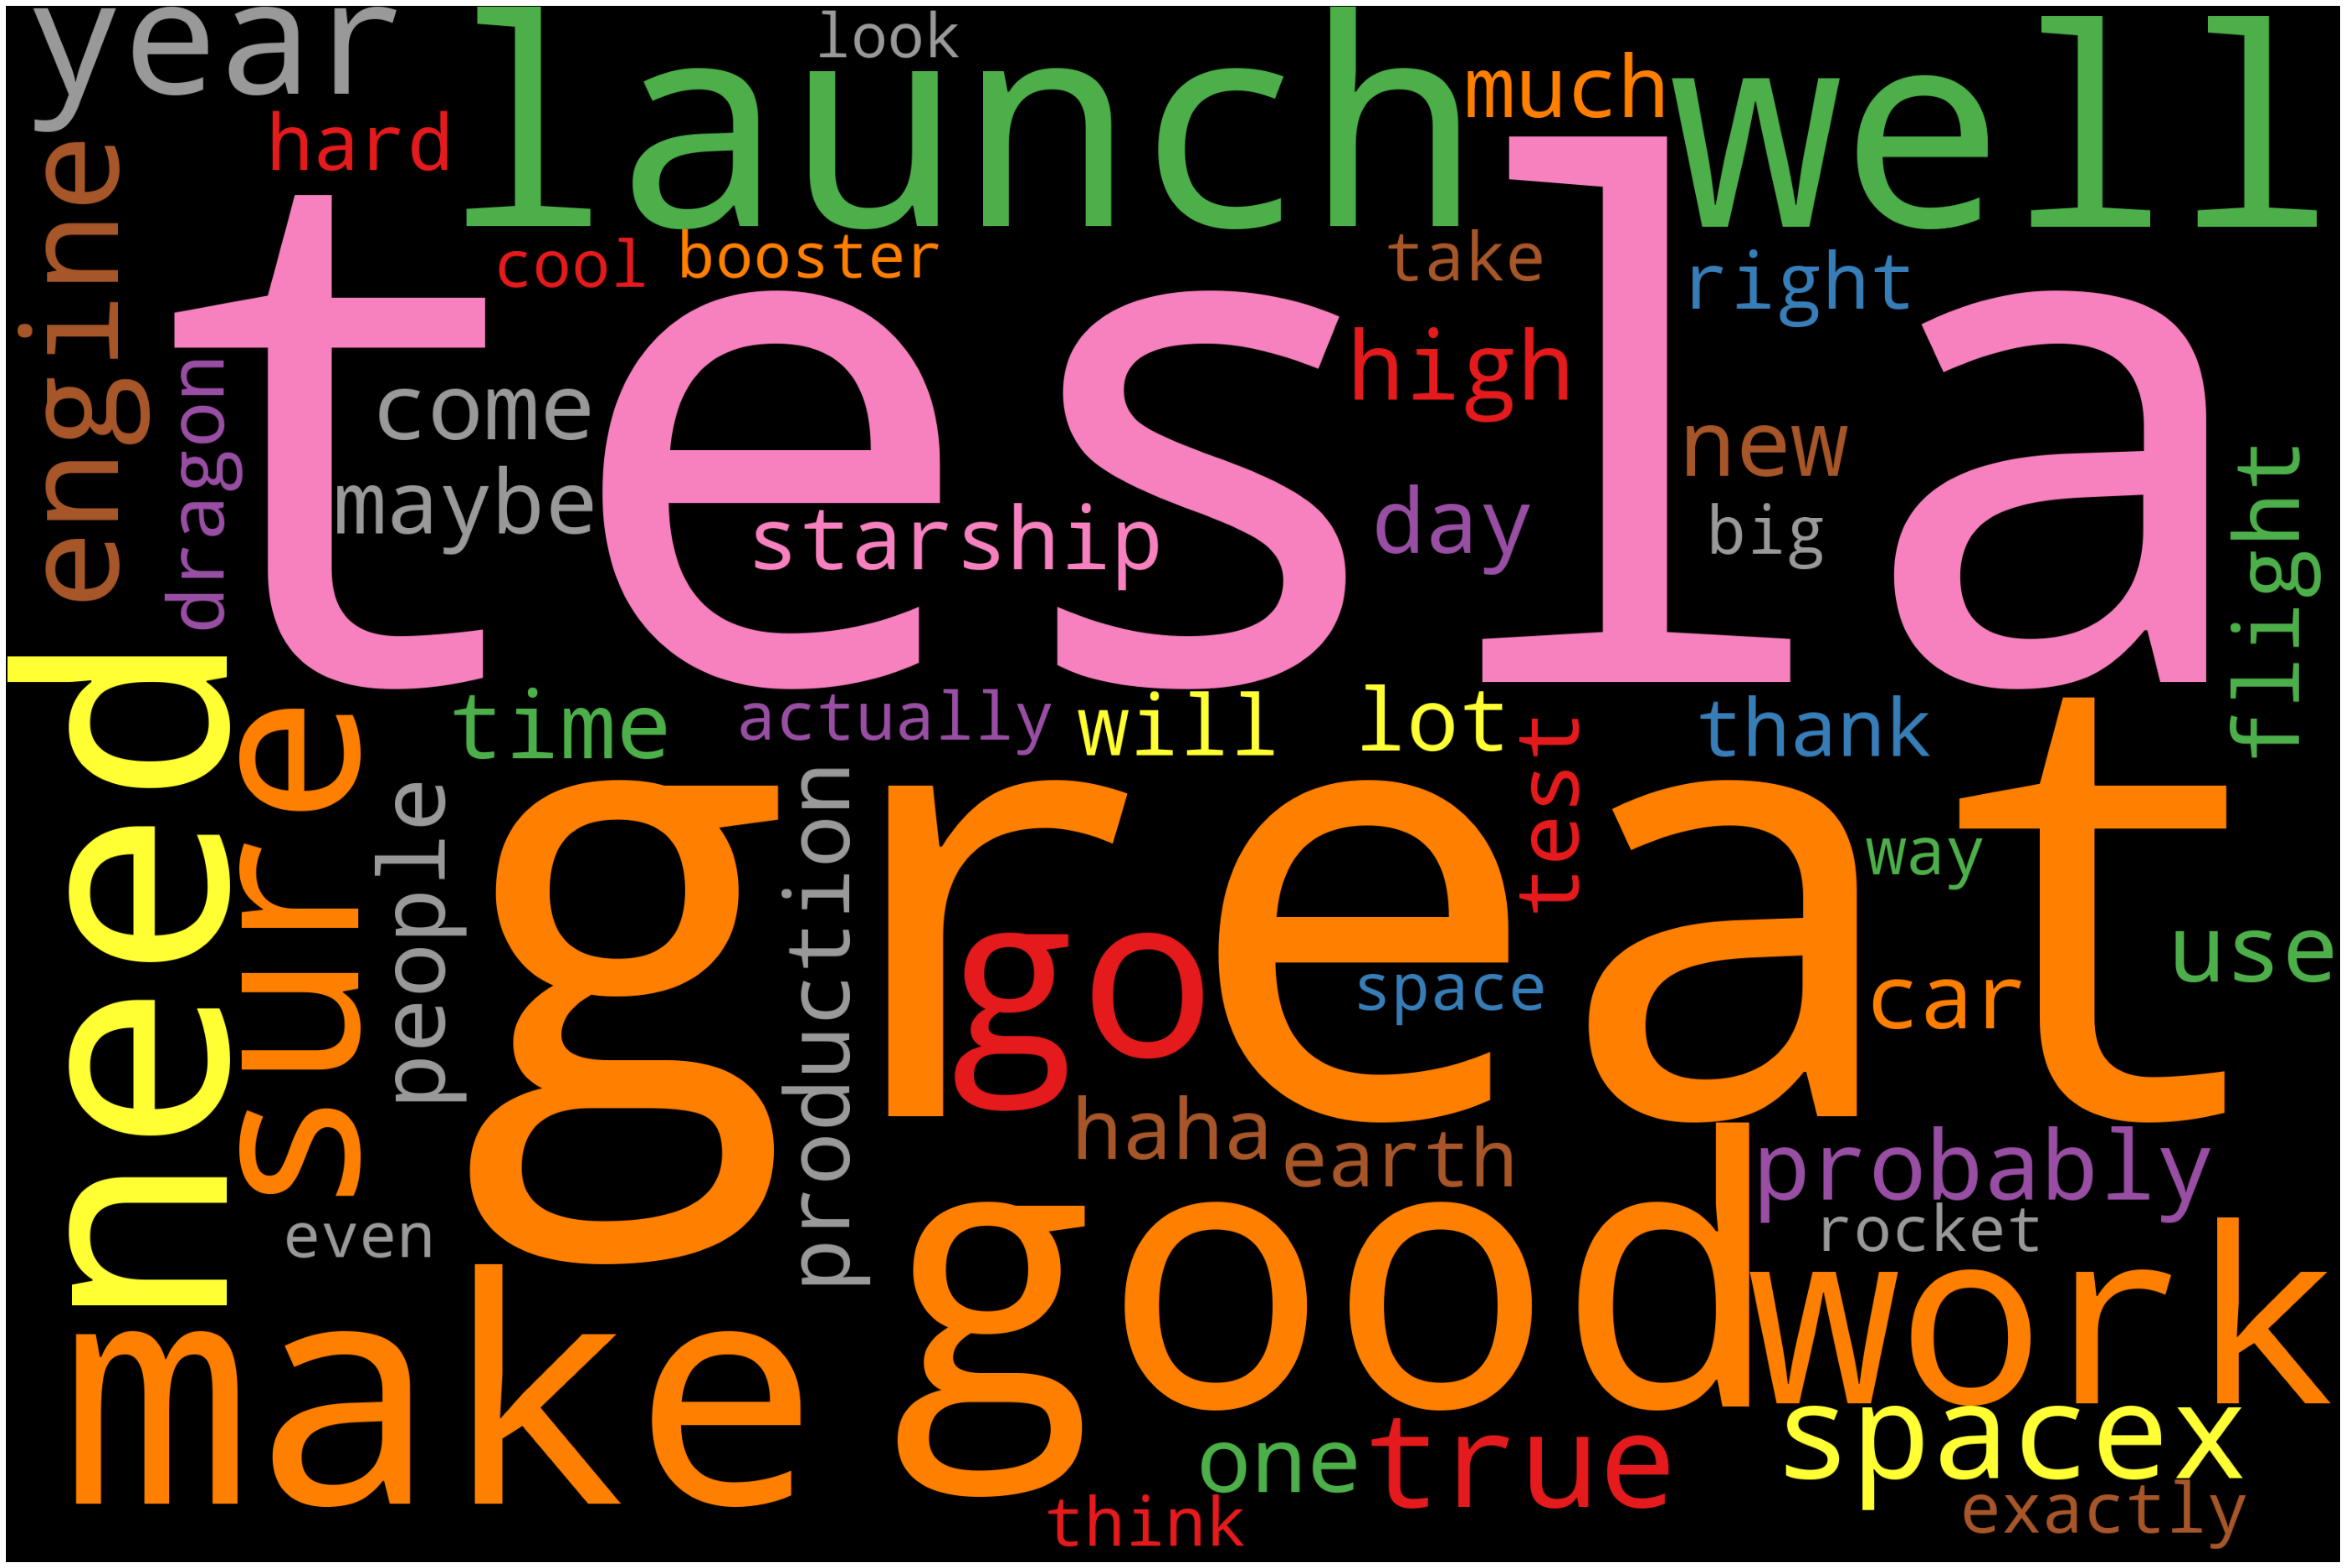

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Define the function to match the word cloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(50,40))
  plt.imshow(wordcloud)
  plt.axis('off')


# Generate word cloud
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                      colormap="Set1",stopwords=STOPWORDS).generate(clean_tw)
plot_cloud(wordcloud)

Named Entity Recognition (NER)

In [ ]:
# parts of speech (POS) tagging
one_block=clean_tw
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
# filtering the nouns and verbs only
nouns_verb=[token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
nouns_verb

['ray',
 'trace',
 'nextlevel',
 'try',
 'interview',
 'execution',
 'year',
 'year',
 'ox',
 'frodo',
 'think',
 'fail',
 'thank',
 'tweet',
 'represent',
 'time',
 'allocation',
 'outcome',
 'send',
 'agree',
 'clubhouse',
 'get',
 'buy',
 'dogecoin',
 'toddler',
 'hodler',
 'issue',
 'sentencing',
 'seem',
 'thank',
 'fix',
 'unlock',
 'account',
 'power',
 'crypto',
 'wallet',
 'give',
 'avoid',
 'cost',
 'app',
 'falcon',
 'launch',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'ipo',
 'starlink',
 'endeavor',
 'pass',
 'chasm',
 'cash',
 'flow',
 'year',
 'cost',
 'ton',
 'carbon',
 'sequester',
 'value',
 'product',
 'make',
 'scalable',
 'g',
 'mean',
 'price',
 'country',
 'difference',
 'ship',
 'intend',
 'earth',
 'idea',
 'apply',
 'team',
 'manage',
 'carbon',
 'capture',
 'tesla',
 'receive',
 'stock',
 'comp',
 'stock',
 'option',
 'take',
 'table',
 'miss',
 'work',
 'go',
 'seem',
 'appear',
 'fix',
 'coin',
 'unit',
 'time',
 'launch',
 'tower',

In [ ]:
# Counting the nouns and verb tokens
x= cv.fit_transform(nouns_verb)
sum_words=x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=["word","count"]
wd_df[0:10]

,word,count
0,launch,64
1,make,64
2,year,49
3,work,48
4,go,47
5,need,42
6,come,39
7,get,38
8,day,38
9,time,37


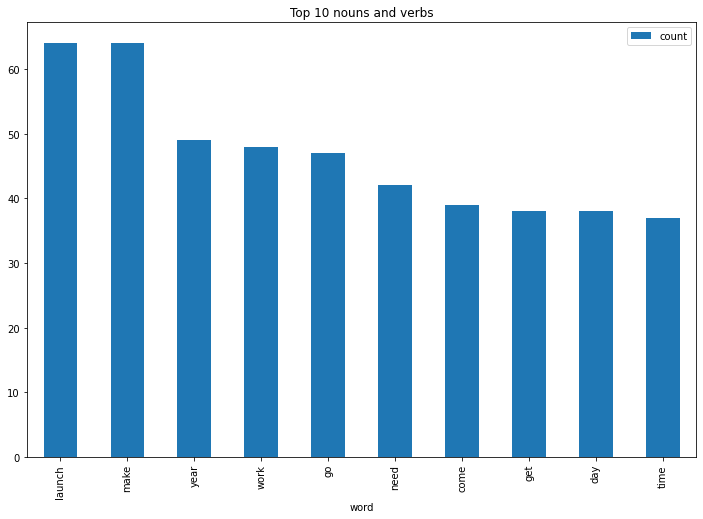

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentence=tokenize.sent_tokenize(" ".join(tw))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent=pd.DataFrame(sentence,columns=["sentence"])
sent

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
from google.colab import files
files.upload()

Saving Afinn.csv to Afinn.csv


{'Afinn.csv': b"word,value\r\nabandon,-2\r\nabandoned,-2\r\nabandons,-2\r\nabducted,-2\r\nabduction,-2\r\nabductions,-2\r\nabhor,-3\r\nabhorred,-3\r\nabhorrent,-3\r\nabhors,-3\r\nabilities,2\r\nability,2\r\naboard,1\r\nabsentee,-1\r\nabsentees,-1\r\nabsolve,2\r\nabsolved,2\r\nabsolves,2\r\nabsolving,2\r\nabsorbed,1\r\nabuse,-3\r\nabused,-3\r\nabuses,-3\r\nabusive,-3\r\naccept,1\r\naccepted,1\r\naccepting,1\r\naccepts,1\r\naccident,-2\r\naccidental,-2\r\naccidentally,-2\r\naccidents,-2\r\naccomplish,2\r\naccomplished,2\r\naccomplishes,2\r\naccusation,-2\r\naccusations,-2\r\naccuse,-2\r\naccused,-2\r\naccuses,-2\r\naccusing,-2\r\nache,-2\r\nachievable,1\r\naching,-2\r\nacquit,2\r\nacquits,2\r\nacquitted,2\r\nacquitting,2\r\nacrimonious,-3\r\nactive,1\r\nadequate,1\r\nadmire,3\r\nadmired,3\r\nadmires,3\r\nadmiring,3\r\nadmit,-1\r\nadmits,-1\r\nadmitted,-1\r\nadmonish,-2\r\nadmonished,-2\r\nadopt,1\r\nadopts,1\r\nadorable,3\r\nadore,3\r\nadored,3\r\nadores,3\r\nadvanced,1\r\nadvantage,2\r\

In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='great')

3

In [ ]:
# Calculating sentiment value for each sentence
sent['sentiment_value']=sent['sentence'].apply(calculate_sentiment)
sent['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent['word_count']=sent['sentence'].str.split().apply(len)
sent['word_count']


0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [ ]:
sent.sort_values(by='sentiment_value')


,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69
...,...,...,...
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72


In [ ]:
# Sentiment score of the whole review
sent['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent[sent['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [ ]:
# positive sentiment score of the whole review
sent[sent['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [ ]:
# Adding index cloumn
sent['index']=range(0,len(sent))
sent

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


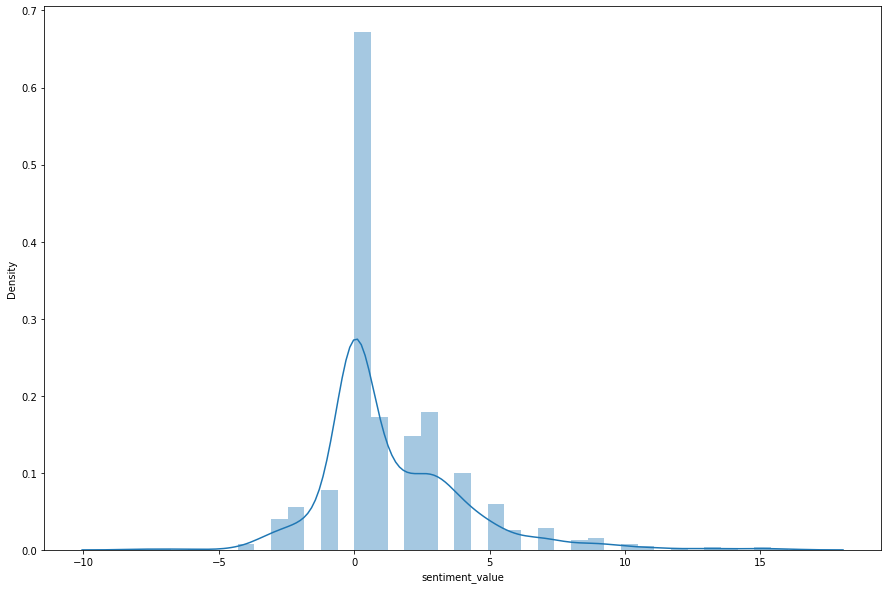

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent['sentiment_value'])


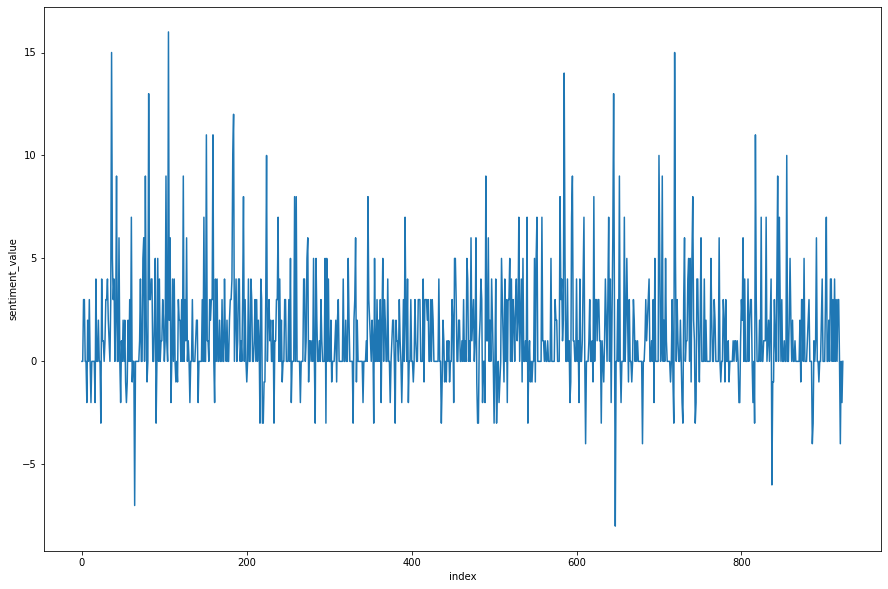

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent)

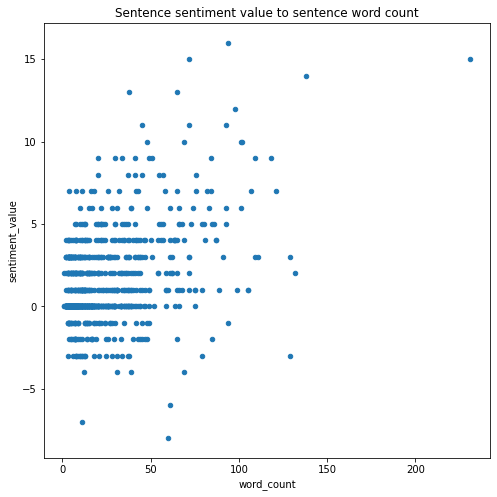

In [ ]:
# Correlation analysis
sent.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')